# Ejercicio Práctica 6: métodos de gradiente adaptativos (AdaGrad)

En este ejercicio implementaremos el método AdaGrad y compararemos su comportamiento con los métodos de gradiente con y sin momento estudiados en la práctica 6. Lo haremos sobre el mismo problema modelo

$$
f(x,y) = \frac{1}{2} (x^2 + b y^2)
$$
con $b = 0.01$. 

Empezamos recordando los métodos de gradiente sin y con momento

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

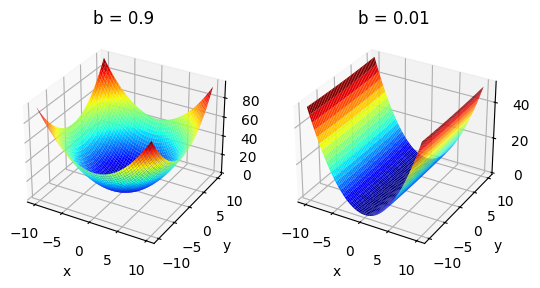

In [2]:
def objective(x):
    return 0.5 * (x[0] ** 2 + b * x[1] ** 2)

def gradiente(x):
    return np.asarray([x[0], b * x[1]])

r_min, r_max = -10.0, + 10.0
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# creamos la malla
x, y = np.meshgrid(xaxis, yaxis)
v = x, y
b = 0.9
results_09 = objective(v)
b = 0.01
results_001 = objective(v)
# dibujamos en 3D con el tipo de color jet
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
ax1.plot_surface(x, y, results_09, cmap='jet')
ax1.set_title('b = 0.9')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.plot_surface(x, y, results_001, cmap='jet')
ax2.set_title('b = 0.01')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
# mostramos el gráfico
plt.show()


# Método de gradiente sin momento
b = 0.01
def gradient_descent(objective, initial_guess, gradient, n_iter, step_size):
    solution = initial_guess
    iterations, solutions, scores = list(), list(), list()
    for i in range(n_iter):
        gradient = gradiente(solution)
        solution = solution - step_size * gradient 
        solution_eval = objective(solution)
        # ahora almacenamos las soluciones y los valores de la función objetivo
        iterations.append(i)
        solutions.append(solution)
        scores.append(solution_eval)
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [iterations, solutions, scores]


# Método de gradiente con momento
def gradient_descent_moment(objective, initial_guess, initial_velocity, 
                            gradient, n_iter, step_size_sol, step_size_vel):
    solution = initial_guess
    velocity = initial_velocity
    iterations, solutions, scores = list(), list(), list()
    for i in range(n_iter):
        gradient = gradiente(solution)
        velocity = step_size_vel * velocity - step_size_sol * gradient
        solution = solution + velocity
        solution_eval = objective(solution)
        # ahora almacenamos las soluciones y los valores de la función objetivo
        iterations.append(i)
        solutions.append(solution)
        scores.append(solution_eval)
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [iterations, solutions, scores]



Fija los parámtros de ambos métodos con los mismo valores que en la práctica $6$ pero con $1000$ iteraciones

In [3]:
# Completar aquí
initial_guess = np.asarray([2., 2.])
n_iter = 1000
step_size = 0.1
# --------------------


Ejecuta el método de gradiente sin momento 

In [4]:
# Completar aquí
results_gd = gradient_descent(objective, initial_guess, gradiente, n_iter, step_size)
# --------------------


>0 f([1.8   1.998]) = 1.63996
>1 f([1.62     1.996002]) = 1.33212
>2 f([1.458    1.994006]) = 1.08276
>3 f([1.3122     1.99201199]) = 0.88077
>4 f([1.18098    1.99001998]) = 0.71716
>5 f([1.062882   1.98802996]) = 0.58462
>6 f([0.9565938  1.98604193]) = 0.47726
>7 f([0.86093442 1.98405589]) = 0.39029
>8 f([0.77484098 1.98207183]) = 0.31983
>9 f([0.69735688 1.98008976]) = 0.26276
>10 f([0.62762119 1.97810967]) = 0.21652
>11 f([0.56485907 1.97613156]) = 0.17906
>12 f([0.50837317 1.97415543]) = 0.14871
>13 f([0.45753585 1.97218127]) = 0.12412
>14 f([0.41178226 1.97020909]) = 0.10419
>15 f([0.37060404 1.96823888]) = 0.08804
>16 f([0.33354363 1.96627064]) = 0.07496
>17 f([0.30018927 1.96430437]) = 0.06435
>18 f([0.27017034 1.96234007]) = 0.05575
>19 f([0.24315331 1.96037773]) = 0.04878
>20 f([0.21883798 1.95841735]) = 0.04312
>21 f([0.19695418 1.95645893]) = 0.03853
>22 f([0.17725876 1.95450248]) = 0.03481
>23 f([0.15953289 1.95254797]) = 0.03179
>24 f([0.1435796  1.95059543]) = 0.02933
>25

Ejecuta el método de gradiente con momento

In [5]:
# Completar aquí
initial_velocity = np.asarray([0., 0.])
step_size_vel = 0.5
results_gd_moment = gradient_descent_moment(objective, initial_guess, initial_velocity, gradiente, n_iter, step_size, step_size_vel)
# --------------------


>0 f([1.8   1.998]) = 1.63996
>1 f([1.52     1.995002]) = 1.17510
>2 f([1.228    1.991508]) = 0.77382
>3 f([0.9592     1.98776949]) = 0.47979
>4 f([0.72888    1.98391247]) = 0.28531
>5 f([0.540832   1.98000004]) = 0.16585
>6 f([0.3927248  1.97606383]) = 0.09664
>7 f([0.27939872 1.97211966]) = 0.05848
>8 f([0.19479581 1.96817545]) = 0.03834
>9 f([0.13301477 1.96423518]) = 0.02814
>10 f([0.08882278 1.9603008 ]) = 0.02316
>11 f([0.0578445  1.95637331]) = 0.02081
>12 f([0.03657091 1.9524532 ]) = 0.01973
>13 f([0.02227703 1.94854068]) = 0.01923
>14 f([0.01290238 1.94463589]) = 0.01899
>15 f([0.00692482 1.94073885]) = 0.01886
>16 f([0.00324356 1.9368496 ]) = 0.01876
>17 f([1.07857161e-03 1.93296812e+00]) = 0.01868
>18 f([-1.11779133e-04  1.92909441e+00]) = 0.01861
>19 f([-6.95776592e-04  1.92522847e+00]) = 0.01853
>20 f([-9.18197662e-04  1.92137026e+00]) = 0.01846
>21 f([-9.37588430e-04  1.91751979e+00]) = 0.01838
>22 f([-8.53524972e-04  1.91367704e+00]) = 0.01831
>23 f([-7.26140745e-04  1.9

Siguiendo los mismos pasos que en los dos casos anteriores, implementa el método **AdaGrad**.
Con las adaptaciones pertinentes, puedes utilizar la implementación que aparece en la página 250 de:

J. Brownlee: Optimization for Machine Learning. Machine Learning Mastery, 2021-2023

In [6]:
# Completar aquí
def adagrad(objective, initial_guess, gradient, n_iter, step_size, epsilon=1e-8):
    solution = initial_guess
    iterations, solutions, scores = list(), list(), list()
    squared_gradients = np.zeros_like(solution)  # Inicialización de los gradientes al cuadrado acumulados

    for i in range(n_iter):
        grad = gradient(solution)
        squared_gradients += grad ** 2  # Acumula el cuadrado del gradiente
        adjusted_step_size = step_size / (np.sqrt(squared_gradients) + epsilon)  # Ajuste de la tasa de aprendizaje
        solution = solution - adjusted_step_size * grad
        solution_eval = objective(solution)
        
        # Almacena soluciones y valores de la función objetivo
        iterations.append(i)
        solutions.append(solution)
        scores.append(solution_eval)
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))

    return [iterations, solutions, scores]
# --------------------


Ejecuta AdaGrad que acabas de implementar con el mismo step_size e initial_guess que usaste en los dos métodos anteriores

In [7]:
# Completar aquí
results_adagrad = adagrad(objective, initial_guess, gradiente, n_iter, step_size)
# --------------------


>0 f([1.9        1.90000005]) = 1.82305
>1 f([1.83112505 1.83112513]) = 1.69327
>2 f([1.77582152 1.7758216 ]) = 1.59254
>3 f([1.72855704 1.72855714]) = 1.50889
>4 f([1.6867616  1.68676171]) = 1.43681
>5 f([1.64899688 1.648997  ]) = 1.37319
>6 f([1.61436267 1.61436279]) = 1.31611
>7 f([1.58225154 1.58225167]) = 1.26428
>8 f([1.55223083 1.55223096]) = 1.21676
>9 f([1.52397945 1.52397959]) = 1.17287
>10 f([1.49725138 1.49725152]) = 1.13209
>11 f([1.47185314 1.47185329]) = 1.09401
>12 f([1.44762935 1.4476295 ]) = 1.05829
>13 f([1.42445295 1.4244531 ]) = 1.02468
>14 f([1.40221846 1.40221861]) = 0.99294
>15 f([1.38083718 1.38083733]) = 0.96289
>16 f([1.36023368 1.36023383]) = 0.93437
>17 f([1.34034314 1.3403433 ]) = 0.90724
>18 f([1.32110941 1.32110957]) = 0.88139
>19 f([1.30248343 1.3024836 ]) = 0.85671
>20 f([1.28442206 1.28442222]) = 0.83312
>21 f([1.2668871  1.26688727]) = 0.81053
>22 f([1.24984455 1.24984472]) = 0.78887
>23 f([1.23326399 1.23326416]) = 0.76807
>24 f([1.21711804 1.217118

Representa en un mismo gráfico la historia de convergencia de los tres algoritmos: gradiente sin momento, gradiente con momento, y AdaGrad.

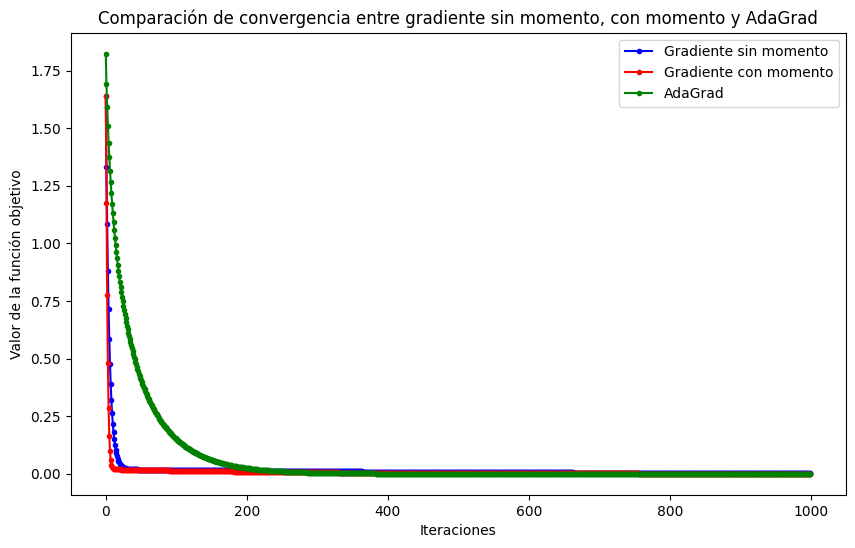

In [8]:
# Completar aquí
plt.figure(figsize=(10, 6))

# Historia de convergencia de gradiente sin momento
plt.plot(results_gd[0], results_gd[2], 'b.-', label='Gradiente sin momento')

# Historia de convergencia de gradiente con momento
plt.plot(results_gd_moment[0], results_gd_moment[2], 'r.-', label='Gradiente con momento')

# Historia de convergencia de AdaGrad
plt.plot(results_adagrad[0], results_adagrad[2], 'g.-', label='AdaGrad')

# Configuración del gráfico
plt.xlabel('Iteraciones')
plt.ylabel('Valor de la función objetivo')
plt.title('Comparación de convergencia entre gradiente sin momento, con momento y AdaGrad')
plt.legend()

# Mostrar el gráfico
plt.show()
# --------------------


Como puedes observar, el algoritmo que mejor se comporta al inicio es el método de gradiente con momento. Sin embargo, la escala del dibujo no nos permite averigual qué sucede en las últimas iteraciones.

Para ver qué pasa al final cambia la escala del dibujo usando una escala logarítmica en base $10$ para las iteraciones y en base $2$ para el coste. Para ver cómo se hace esto, mira [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html)

¿Quién es ahora el ganador? Explica el comportamiento de los tres algoritmos señalando sus principales diferencias.

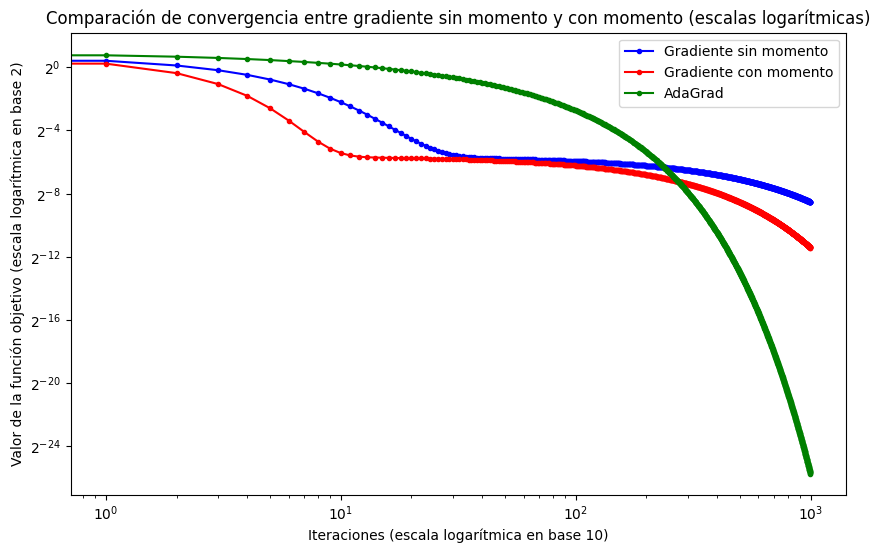

In [9]:
# Completar aquí
# Graficar la historia de convergencia de los dos métodos de gradiente (sin momento y con momento)
plt.figure(figsize=(10, 6))

# Historia de convergencia de gradiente sin momento
plt.plot(results_gd[0], results_gd[2], 'b.-', label='Gradiente sin momento')

# Historia de convergencia de gradiente con momento
plt.plot(results_gd_moment[0], results_gd_moment[2], 'r.-', label='Gradiente con momento')

# Historia de convergencia de AdaGrad
plt.plot(results_adagrad[0], results_adagrad[2], 'g.-', label='AdaGrad')

# Configuración del gráfico
plt.xscale('log', base=10)
plt.yscale('log', base=2)
plt.xlabel('Iteraciones (escala logarítmica en base 10)')
plt.ylabel('Valor de la función objetivo (escala logarítmica en base 2)')
plt.title('Comparación de convergencia entre gradiente sin momento y con momento (escalas logarítmicas)')
plt.legend()

# Mostrar el gráfico
plt.show()

# --------------------


- **Gradiente con momento** muestra ser el más balanceado en términos de velocidad y estabilidad de convergencia, alcanzando el mínimo más rápido de manera estable en este caso.
- **AdaGrad** es útil cuando necesitamos convergencia rápida al inicio, pero su efectividad disminuye en problemas donde la convergencia requiere muchas iteraciones.
- **Gradiente sin momento** es el método más básico y generalmente más lento, adecuado solo para problemas simples o en casos donde no se necesite una convergencia rápida.

En este caso, el método de **gradiente con momento es el ganador** en términos de eficiencia y estabilidad en la convergencia.